<a href="https://colab.research.google.com/github/Chins-10/Data-Analyst-Portfolio/blob/main/p2_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Huffman Coding
import numpy as np
#from scipy.misc import imread
from collections import Counter
from heapq import heappush, heappop
from math import log2
from PIL import Image
def compute_probabilities(arr):
    counter = Counter(arr.flatten())
    total_count = sum(counter.values())
    probabilities = {k: v / total_count for k, v in counter.items()}
    return probabilities

def construct_huffman_tree(probabilities):
    heap = [[prob, [value, '']] for value, prob in probabilities.items()]
    while len(heap) > 1:
        left = heappop(heap)
        right = heappop(heap)
        for pair in left[1:]:
            pair[1] = '0' + pair[1]
        for pair in right[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [left[0] + right[0]] + left[1:] + right[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

def encode(arr, huffman_tree):
    encoding_dict = dict(huffman_tree)
    bitstream = ''
    for value in arr.flatten():
        bitstream += encoding_dict[value]
    return bitstream

# Load the two images and convert them into arrays of pixel values
img1 = Image.open('/content/IMAGE1.png')
img2 = Image.open('/content/IMAGE2.png')
arr1 = np.array(img1)
arr2 = np.array(img2)

# Compute the probability distribution of each pixel value in the two images
probabilities1 = compute_probabilities(arr1)
probabilities2 = compute_probabilities(arr2)

# Use the probability distributions to construct Huffman trees for each image
huffman_tree1 = construct_huffman_tree(probabilities1)
huffman_tree2 = construct_huffman_tree(probabilities2)
#print(huffman_tree1)
# Encode each pixel value in the two images using the Huffman trees
bitstream1 = encode(arr1, huffman_tree1)
bitstream2 = encode(arr2, huffman_tree2)

# Compute the entropy of each image
entropy1 = sum(-p * log2(p) for p in probabilities1.values())
entropy2 = sum(-p * log2(p) for p in probabilities2.values())

# Compare the length of the compressed bitstreams with the entropy of the images
print(f"Image 1:\nEntropy: {entropy1:.2f} bits/pixel\nCompressed bitstream length: {len(bitstream1)} bits\nCompression ratio: {entropy1 / len(bitstream1):.2f}")
print(f"Image 2:\nEntropy: {entropy2:.2f} bits/pixel\nCompressed bitstream length: {len(bitstream2)} bits\nCompression ratio: {entropy2 / len(bitstream2):.2f}")


Image 1:
Entropy: 7.44 bits/pixel
Compressed bitstream length: 18041160 bits
Compression ratio: 0.00
Image 2:
Entropy: 7.21 bits/pixel
Compressed bitstream length: 17545088 bits
Compression ratio: 0.00


In [ ]:
#Shannon Coding
import numpy as np
#from scipy.misc import imread
from collections import Counter
from math import log2, ceil

def compute_probabilities(arr):
    counter = Counter(arr.flatten())
    total_count = sum(counter.values())
    probabilities = {k: v / total_count for k, v in counter.items()}
    return probabilities

# Load the two images and convert them into arrays of pixel values
img1 = Image.open('/content/IMAGE1.png')
img2 = Image.open('/content/IMAGE2.png')
arr1 = np.array(img1)
arr2 = np.array(img2)

# Compute the probability distribution of each pixel value in the two images
probabilities1 = compute_probabilities(arr1)
probabilities2 = compute_probabilities(arr2)

# Sort the pixel values in descending order of their probabilities
sorted_values1 = sorted(probabilities1.keys(), key=lambda x: -probabilities1[x])
sorted_values2 = sorted(probabilities2.keys(), key=lambda x: -probabilities2[x])

# Calculate the cumulative probabilities and map each pixel value to an integer codeword
codewords1 = {}
codewords2 = {}
code_length1 = ceil(log2(len(sorted_values1)))
code_length2 = ceil(log2(len(sorted_values2)))
cumulative_prob1 = 0
cumulative_prob2 = 0
for i, value in enumerate(sorted_values1):
    codewords1[value] = bin(i)[2:].zfill(code_length1)
    cumulative_prob1 += probabilities1[value]
for i, value in enumerate(sorted_values2):
    codewords2[value] = bin(i)[2:].zfill(code_length2)
    cumulative_prob2 += probabilities2[value]

# Encode each pixel value in the two images using the Shannon code
bitstream1 = ''.join(codewords1[value] for value in arr1.flatten())
bitstream2 = ''.join(codewords2[value] for value in arr2.flatten())

# Compute the entropy of each image
entropy1 = sum(-p * log2(p) for p in probabilities1.values())
entropy2 = sum(-p * log2(p) for p in probabilities2.values())

# Compare the length of the compressed bitstreams with the entropy of the images
print(f"Image 1:\nEntropy: {entropy1:.2f} bits/pixel\nCompressed bitstream length: {len(bitstream1)} bits\nCompression ratio: {entropy1 / len(bitstream1):.2f}")
print(f"Image 2:\nEntropy: {entropy2:.2f} bits/pixel\nCompressed bitstream length: {len(bitstream2)} bits\nCompression ratio: {entropy2 / len(bitstream2):.2f}")


Image 1:
Entropy: 7.44 bits/pixel
Compressed bitstream length: 18874368 bits
Compression ratio: 0.00
Image 2:
Entropy: 7.21 bits/pixel
Compressed bitstream length: 18874368 bits
Compression ratio: 0.00


In [ ]:
from PIL import Image
import numpy as np

lena = Image.open('/content/IMAGE1.png').convert('L')
baboon = Image.open('/content/IMAGE2.png').convert('L')


In [ ]:
import pywt

def compressive_sensing(img, ratio):
    # Perform wavelet transform
    coeffs = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs

    # Threshold the wavelet coefficients
    thresh = np.percentile(abs(cH), ratio)
    cH[np.where(abs(cH) < thresh)] = 0
    thresh = np.percentile(abs(cV), ratio)
    cV[np.where(abs(cV) < thresh)] = 0
    thresh = np.percentile(abs(cD), ratio)
    cD[np.where(abs(cD) < thresh)] = 0

    # Perform inverse wavelet transform
    coeffs = cA, (cH, cV, cD)
    img_cs = pywt.idwt2(coeffs, 'haar')
    return img_cs


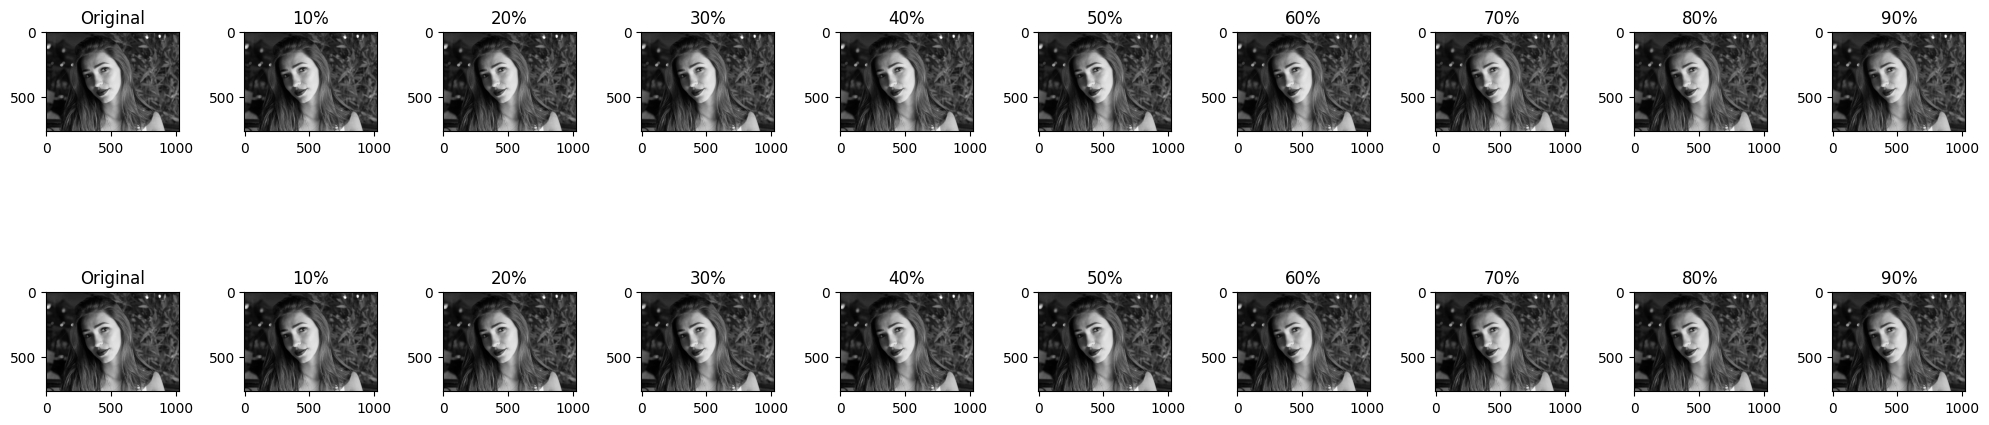

In [ ]:
import matplotlib.pyplot as plt

# Compression ratios to test
ratios = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Plot original images
fig, axes = plt.subplots(2, len(ratios) + 1, figsize=(20, 6))
axes[0, 0].imshow(lena, cmap='gray')
axes[0, 0].set_title('Original')
axes[1, 0].imshow(baboon, cmap='gray')
axes[1, 0].set_title('Original')

# Plot compressed images
for i, ratio in enumerate(ratios):
    lena_cs = compressive_sensing(lena, ratio)
    baboon_cs = compressive_sensing(baboon, ratio)

    axes[0, i+1].imshow(lena_cs, cmap='gray')
    axes[0, i+1].set_title(f'{ratio}%')
    axes[1, i+1].imshow(baboon_cs, cmap='gray')
    axes[1, i+1].set_title(f'{ratio}%')

plt.tight_layout()
plt.show()
